In [2]:
import pandas as pd
import numpy as np
import glob
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 수정 --ver. windows
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [62]:
# 불러올 csv 파일들이 있는 베이스 경로 설정
directory = r"C:/Users/Jayden Jeong/OneDrive/바탕 화면/project/final_project/data/중국데이터/에너지/"

# 디렉토리 내의 모든 csv 파일 매칭하기
csv_files = glob.glob(directory + '*.csv')

# 모든 csv 파일을 데이터프레임으로 읽어오기
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding ='cp949', skiprows = 2)
    df = df.T # 행렬 전치
    df = df.iloc[:, :2] # 두번째컬럼까지만 추출
    dfs.append(df)

# 하나의 데이터프레임으로 병합
total_df = pd.concat(dfs, ignore_index=True, axis = 1)

total_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Indicators,Output of Asphalt Current Period(10000 tons),Output of Asphalt Accumulated(10000 tons),Output of Coal Current Period(10000 tons),Output of Coal Accumulated(10000 tons),Output of Coalbed Gas Current Period(100 milli...,Output of Coalbed Gas Accumulated(100 million ...,Output of Coke Current Period(10000 tons),Output of Coke Accumulated(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Crude oil Accumulated(10000 tons),...,Output of Naphtha Current Period(10000 tons),Output of Naphtha Accumulated(10000 tons),Output of Natural Gas Current Period(100 milli...,Output of Natural Gas Accumulated(100 million ...,Output of Petroleum Coke Current Period(10000 ...,Output of Petroleum Coke Accumulated(10000 tons),Output of Processing Volume of Crude oil Curre...,Output of Processing Volume of Crude oil Accum...,Output of Thermal Power Current Period(100 mil...,Output of Thermal Power Accumulated(100 millio...
Apr 2024,273.8,1072.7,37166.5,147579.0,13.2,51.3,3849.0,15848.4,1746.7,7095.4,...,652.8,2668.4,198.4,830.1,269.6,1120.4,5878.8,24125.6,4578.7,20621.9
Mar 2024,283.1,798.9,39933.3,110556.0,12.8,38.0,3937.2,11988.8,1837.1,5348.1,...,680.2,2015.2,215.9,631.9,284.6,851.0,6377.6,18246.1,5200.7,16028.0
Feb 2024,NaN,515.8,NaN,70526.7,NaN,25.2,NaN,8039.5,NaN,3510.9,...,NaN,1338.4,NaN,416.7,NaN,565.5,NaN,11875.5,NaN,10801.9
Jan 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# 컬럼명을 첫번째 행으로 설정
total_df.columns = total_df.iloc[0, :]

In [80]:
total_df.head()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Asphalt Accumulated(10000 tons),Output of Coal Current Period(10000 tons),Output of Coal Accumulated(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coalbed Gas Accumulated(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Coke Accumulated(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Crude oil Accumulated(10000 tons),...,Output of Naphtha Current Period(10000 tons),Output of Naphtha Accumulated(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Natural Gas Accumulated(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Petroleum Coke Accumulated(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Processing Volume of Crude oil Accumulated(10000 tons),Output of Thermal Power Current Period(100 million kwh),Output of Thermal Power Accumulated(100 million kwh)
Indicators,Output of Asphalt Current Period(10000 tons),Output of Asphalt Accumulated(10000 tons),Output of Coal Current Period(10000 tons),Output of Coal Accumulated(10000 tons),Output of Coalbed Gas Current Period(100 milli...,Output of Coalbed Gas Accumulated(100 million ...,Output of Coke Current Period(10000 tons),Output of Coke Accumulated(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Crude oil Accumulated(10000 tons),...,Output of Naphtha Current Period(10000 tons),Output of Naphtha Accumulated(10000 tons),Output of Natural Gas Current Period(100 milli...,Output of Natural Gas Accumulated(100 million ...,Output of Petroleum Coke Current Period(10000 ...,Output of Petroleum Coke Accumulated(10000 tons),Output of Processing Volume of Crude oil Curre...,Output of Processing Volume of Crude oil Accum...,Output of Thermal Power Current Period(100 mil...,Output of Thermal Power Accumulated(100 millio...
Apr 2024,273.8,1072.7,37166.5,147579.0,13.2,51.3,3849.0,15848.4,1746.7,7095.4,...,652.8,2668.4,198.4,830.1,269.6,1120.4,5878.8,24125.6,4578.7,20621.9
Mar 2024,283.1,798.9,39933.3,110556.0,12.8,38.0,3937.2,11988.8,1837.1,5348.1,...,680.2,2015.2,215.9,631.9,284.6,851.0,6377.6,18246.1,5200.7,16028.0
Feb 2024,NaN,515.8,NaN,70526.7,NaN,25.2,NaN,8039.5,NaN,3510.9,...,NaN,1338.4,NaN,416.7,NaN,565.5,NaN,11875.5,NaN,10801.9
Jan 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# 불필요해진 첫번째 행 삭제
total_df = total_df.iloc[1:, :]

In [98]:
# 대부분의 1월과 2월이 결측임. accumulated 컬럼의 2월달 수치가 current 1월과 2월을 합친 것으로 판단됨.
# current의 1월 2월 결측을 acuumulated 2월달 값의 절반씩으로 치환하기
# 일단 current의 2월값부터 채우기
for idx, row in total_df.iterrows():
    if idx[:3] == "Feb":
        for col in total_df.columns:
            if pd.isna(row[col]):
                # "Accumulated"가 포함된 열을 찾아서 그 값의 절반으로 치환
                accumulated_col = col.replace("Current Period", "Accumulated")
                if accumulated_col in total_df.columns and not pd.isna(total_df.loc[idx, accumulated_col]):
                    total_df.at[idx, col] = total_df.loc[idx, accumulated_col] / 2

In [99]:
# 잘 채워짐
total_df.head()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Asphalt Accumulated(10000 tons),Output of Coal Current Period(10000 tons),Output of Coal Accumulated(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coalbed Gas Accumulated(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Coke Accumulated(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Crude oil Accumulated(10000 tons),...,Output of Naphtha Current Period(10000 tons),Output of Naphtha Accumulated(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Natural Gas Accumulated(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Petroleum Coke Accumulated(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Processing Volume of Crude oil Accumulated(10000 tons),Output of Thermal Power Current Period(100 million kwh),Output of Thermal Power Accumulated(100 million kwh)
Apr 2024,273.8,1072.7,37166.5,147579.0,13.2,51.3,3849.0,15848.4,1746.7,7095.4,...,652.8,2668.4,198.4,830.1,269.6,1120.4,5878.8,24125.6,4578.7,20621.9
Mar 2024,283.1,798.9,39933.3,110556.0,12.8,38.0,3937.2,11988.8,1837.1,5348.1,...,680.2,2015.2,215.9,631.9,284.6,851.0,6377.6,18246.1,5200.7,16028.0
Feb 2024,257.9,515.8,35263.35,70526.7,12.6,25.2,4019.75,8039.5,1755.45,3510.9,...,669.2,1338.4,208.35,416.7,282.75,565.5,5937.75,11875.5,5400.95,10801.9
Jan 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec 2023,289.3,3749.3,41430.7,465838.0,13.8,139.4,4128.1,49260.0,1764.7,20891.5,...,734.7,7837.5,208.6,2297.1,314.2,3342.6,6011.5,73477.8,6109.1,62318.0


In [108]:
# 필요없어진 accumulated 컬럼 삭제
columns_to_drop = total_df.columns[1::2]
total_df = total_df.drop(columns=columns_to_drop)

In [109]:
total_df.head()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh)
Apr 2024,273.8,37166.5,13.2,3849.0,1746.7,1727.0,6900.8,346.4,1332.3,469.2,190.2,408.2,652.8,198.4,269.6,5878.8,4578.7
Mar 2024,283.1,39933.3,12.8,3937.2,1837.1,1868.9,7476.9,402.0,1429.1,509.4,195.1,466.7,680.2,215.9,284.6,6377.6,5200.7
Feb 2024,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95
Jan 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec 2023,289.3,41430.7,13.8,4128.1,1764.7,1840.0,8289.8,398.6,1296.2,395.6,174.4,442.5,734.7,208.6,314.2,6011.5,6109.1


In [111]:
# 1월달 결측치를 2월달값으로 채우기
total_df = total_df.fillna(method="ffill")

In [112]:
total_df.head()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh)
Apr 2024,273.8,37166.50,13.2,3849.00,1746.70,1727.0,6900.80,346.40,1332.3,469.20,190.2,408.20,652.8,198.40,269.60,5878.80,4578.70
Mar 2024,283.1,39933.30,12.8,3937.20,1837.10,1868.9,7476.90,402.00,1429.1,509.40,195.1,466.70,680.2,215.90,284.60,6377.60,5200.70
Feb 2024,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95
Jan 2024,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95
Dec 2023,289.3,41430.70,13.8,4128.10,1764.70,1840.0,8289.80,398.60,1296.2,395.60,174.4,442.50,734.7,208.60,314.20,6011.50,6109.10


In [113]:
# 결측치없음
total_df.isna().sum()

Indicators
Output of Asphalt Current Period(10000 tons)                           0
Output of Coal Current Period(10000 tons)                              0
Output of Coalbed Gas Current Period(100 million cu.m)                 0
Output of Coke Current Period(10000 tons)                              0
Output of Crude oil Current Period(10000 tons)                         0
Output of Diesel Oil Current Period(10000 tons)                        0
Output of Electricity Current Period(100 million kwh)                  0
Output of Fuel Oil Current Period(10000 tons)                          0
Output of Gasoline Current Period(10000 tons)                          0
Output of Kerosene Current Period(10000 tons)                          0
Output of LNG Current Period(10000 tons)                               0
Output of LPG Current Period(10000 tons)                               0
Output of Naphtha Current Period(10000 tons)                           0
Output of Natural Gas Current Period(100

In [117]:
# 처리한 데이터프레임을 CSV로 추출
total_df.to_csv("./중국에너지데이터전처리.csv")

## 에너지데이터와 미세먼지 상관관계 분석

In [119]:
# 순서 뒤집기(가장 오래전을 맨 위로)
total_df = total_df.iloc[::-1]

In [120]:
total_df.head()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh)
Jan 2015,216.9,27325.9,5.2,3592.1,1617.9,1340.2,3653.9,175.0,889.1,276.0,29.6,207.8,215.3,104.7,182.4,3969.5,2914.3
Feb 2015,216.9,27325.9,5.2,3592.1,1617.9,1340.2,3653.9,175.0,889.1,276.0,29.6,207.8,215.3,104.7,182.4,3969.5,2914.3
Mar 2015,256.5,30559.2,5.4,3798.9,1806.5,1557.6,4510.6,219.0,1013.8,311.5,29.3,240.3,257.1,111.5,204.8,4468.9,3497.2
Apr 2015,278.6,29801.7,5.1,3743.2,1750.0,1499.0,4450.3,202.8,1006.3,290.6,40.0,242.1,225.9,94.0,201.6,4313.3,3409.0
May 2015,284.6,30938.5,5.2,3768.8,1813.6,1538.6,4562.2,207.4,1033.6,300.7,35.4,253.9,238.8,98.7,220.2,4392.4,3443.8


In [132]:
total_df.tail()

Indicators,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh)
Dec 2023,289.3,41430.70,13.8,4128.10,1764.70,1840.0,8289.80,398.60,1296.2,395.60,174.4,442.50,734.7,208.60,314.20,6011.50,6109.10
Jan 2024,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95
Feb 2024,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95
Mar 2024,283.1,39933.30,12.8,3937.20,1837.10,1868.9,7476.90,402.00,1429.1,509.40,195.1,466.70,680.2,215.90,284.60,6377.60,5200.70
Apr 2024,273.8,37166.50,13.2,3849.00,1746.70,1727.0,6900.80,346.40,1332.3,469.20,190.2,408.20,652.8,198.40,269.60,5878.80,4578.70


In [139]:
# 미세먼지 데이터들 가져오기
pm25 = pd.read_csv(r"C:\Users\Jayden Jeong\OneDrive\바탕 화면\project\final_project\git\데이터\1. 종속변수/국내초미세먼지농도.csv")
pm10 = pd.read_csv(r"C:\Users\Jayden Jeong\OneDrive\바탕 화면\project\final_project\git\데이터\1. 종속변수/국내미세먼지농도.csv")

In [140]:
# pm10 미세먼지데이터 사용, 서울만 추출
pm10_seoul = pm10.iloc[2:, [0,-1]]

In [141]:
# DATE를 인덱스화 하는 작업
pm10_seoul.columns = ["일시", "PM10"]
pm10_seoul["일시"] = pm10_seoul["일시"].astype("datetime64")
pm10_seoul["year"] = pm10_seoul["일시"].dt.year
pm10_seoul["month"] = pm10_seoul["일시"].dt.month
pm10_seoul = pm10_seoul.set_index("일시")
pm10_seoul["PM10"] = pm10_seoul["PM10"].astype("float64")

In [142]:
pm10_seoul.head()

,PM10,year,month
일시,,,
2015-01-01 03:00:00,63.7,2015,1
2015-01-01 06:00:00,113.3,2015,1
2015-01-01 09:00:00,135.0,2015,1
2015-01-01 12:00:00,85.0,2015,1
2015-01-01 15:00:00,44.7,2015,1


In [143]:
# 년도, 월별로 평균내서 그룹화하기
seoul_mean = pm10_seoul.groupby(["year", "month"])["PM10"].mean()

In [134]:
# 시리즈로 변환
seoul_mean = pd.Series(seoul_mean.values)

In [157]:
# 에너지데이터에 맞춰서 미세먼지는 4월달까지만 추출
seoul_mean = seoul_mean[:-1]

In [158]:
total_df.shape

(112, 17)

In [159]:
seoul_mean.shape

(112,)

In [179]:
total_df = total_df.reset_index(drop = True)

In [182]:
seoul_mean = seoul_mean.reset_index(drop = True)

In [183]:
# 에너지데이터와 서울 미세먼지데이터 합치기
concat_df = pd.concat([total_df, seoul_mean], axis = 1)

In [184]:
concat_df.head()

,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh),PM10
0,216.9,27325.9,5.2,3592.1,1617.9,1340.2,3653.9,175.0,889.1,276.0,29.6,207.8,215.3,104.7,182.4,3969.5,2914.3,46.919028
1,216.9,27325.9,5.2,3592.1,1617.9,1340.2,3653.9,175.0,889.1,276.0,29.6,207.8,215.3,104.7,182.4,3969.5,2914.3,85.794196
2,256.5,30559.2,5.4,3798.9,1806.5,1557.6,4510.6,219.0,1013.8,311.5,29.3,240.3,257.1,111.5,204.8,4468.9,3497.2,68.529046
3,278.6,29801.7,5.1,3743.2,1750.0,1499.0,4450.3,202.8,1006.3,290.6,40.0,242.1,225.9,94.0,201.6,4313.3,3409.0,42.558750
4,284.6,30938.5,5.2,3768.8,1813.6,1538.6,4562.2,207.4,1033.6,300.7,35.4,253.9,238.8,98.7,220.2,4392.4,3443.8,42.142041


In [185]:
concat_df.shape

(112, 18)

In [206]:
# 날짜 인덱스 생성
date = pd.date_range(start="2015-01", end="2024-04", freq = "MS")

In [207]:
date

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01'],
              dtype='datetime64[ns]', length=112, freq='MS')

In [208]:
# 년과 월만 추출
date = date.strftime('%Y-%m')

In [210]:
concat_df = concat_df.set_index(date)

In [211]:
# 인덱스 설정 완료
concat_df

,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh),PM10
2015-01,216.9,27325.90,5.2,3592.10,1617.90,1340.2,3653.90,175.00,889.1,276.00,29.6,207.80,215.3,104.70,182.40,3969.50,2914.30,46.919028
2015-02,216.9,27325.90,5.2,3592.10,1617.90,1340.2,3653.90,175.00,889.1,276.00,29.6,207.80,215.3,104.70,182.40,3969.50,2914.30,85.794196
2015-03,256.5,30559.20,5.4,3798.90,1806.50,1557.6,4510.60,219.00,1013.8,311.50,29.3,240.30,257.1,111.50,204.80,4468.90,3497.20,68.529046
2015-04,278.6,29801.70,5.1,3743.20,1750.00,1499.0,4450.30,202.80,1006.3,290.60,40.0,242.10,225.9,94.00,201.60,4313.30,3409.00,42.558750
2015-05,284.6,30938.50,5.2,3768.80,1813.60,1538.6,4562.20,207.40,1033.6,300.70,35.4,253.90,238.8,98.70,220.20,4392.40,3443.80,42.142041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12,289.3,41430.70,13.8,4128.10,1764.70,1840.0,8289.80,398.60,1296.2,395.60,174.4,442.50,734.7,208.60,314.20,6011.50,6109.10,33.362500
2024-01,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95,31.278947
2024-02,257.9,35263.35,12.6,4019.75,1755.45,1665.7,7435.15,409.05,1374.8,473.95,166.4,456.35,669.2,208.35,282.75,5937.75,5400.95,29.007018
2024-03,283.1,39933.30,12.8,3937.20,1837.10,1868.9,7476.90,402.00,1429.1,509.40,195.1,466.70,680.2,215.90,284.60,6377.60,5200.70,41.237449


In [213]:
# 상관관계 분석
concat_df.corr()

,Output of Asphalt Current Period(10000 tons),Output of Coal Current Period(10000 tons),Output of Coalbed Gas Current Period(100 million cu.m),Output of Coke Current Period(10000 tons),Output of Crude oil Current Period(10000 tons),Output of Diesel Oil Current Period(10000 tons),Output of Electricity Current Period(100 million kwh),Output of Fuel Oil Current Period(10000 tons),Output of Gasoline Current Period(10000 tons),Output of Kerosene Current Period(10000 tons),Output of LNG Current Period(10000 tons),Output of LPG Current Period(10000 tons),Output of Naphtha Current Period(10000 tons),Output of Natural Gas Current Period(100 million cu.m),Output of Petroleum Coke Current Period(10000 tons),Output of Processing Volume of Crude oil Current Period(10000 tons),Output of Thermal Power Current Period(100 million kwh),PM10
Output of Asphalt Current Period(10000 tons),1.000000,0.181099,0.165333,0.329211,-0.274857,-0.393337,0.341088,0.123267,0.230209,0.132371,0.317543,0.390844,0.044827,0.253691,0.243902,0.535301,0.284480,-0.337935
Output of Coal Current Period(10000 tons),0.181099,1.000000,0.829037,0.647045,0.530883,0.606287,0.783355,0.841946,0.657010,-0.018487,0.863947,0.775170,0.823195,0.781922,0.791895,0.762314,0.707472,-0.362292
Output of Coalbed Gas Current Period(100 million cu.m),0.165333,0.829037,1.000000,0.602306,0.373273,0.504972,0.838840,0.848222,0.741721,0.167319,0.930687,0.881976,0.955065,0.927020,0.899952,0.840792,0.800285,-0.288122
Output of Coke Current Period(10000 tons),0.329211,0.647045,0.602306,1.000000,0.356884,0.212054,0.613821,0.536746,0.426630,0.186730,0.679559,0.619111,0.545534,0.498160,0.548516,0.611286,0.514435,-0.333881
Output of Crude oil Current Period(10000 tons),-0.274857,0.530883,0.373273,0.356884,1.000000,0.445914,0.246839,0.462703,0.205912,-0.159156,0.307133,0.197562,0.404378,0.255194,0.286906,0.157645,0.198201,-0.122693
Output of Diesel Oil Current Period(10000 tons),-0.393337,0.606287,0.504972,0.212054,0.445914,1.000000,0.369827,0.506935,0.472365,0.122874,0.459811,0.366240,0.641766,0.380538,0.561698,0.351852,0.341509,-0.094060
Output of Electricity Current Period(100 million kwh),0.341088,0.783355,0.838840,0.613821,0.246839,0.369827,1.000000,0.801856,0.802441,0.208623,0.867712,0.879987,0.816022,0.820305,0.837843,0.870880,0.961614,-0.530153
Output of Fuel Oil Current Period(10000 tons),0.123267,0.841946,0.848222,0.536746,0.462703,0.506935,0.801856,1.000000,0.701857,-0.136534,0.855422,0.835688,0.845040,0.817361,0.803436,0.763283,0.738729,-0.327649
Output of Gasoline Current Period(10000 tons),0.230209,0.657010,0.741721,0.426630,0.205912,0.472365,0.802441,0.701857,1.000000,0.385011,0.799964,0.836162,0.801975,0.749963,0.793301,0.846325,0.756766,-0.334546
Output of Kerosene Current Period(10000 tons),0.132371,-0.018487,0.167319,0.186730,-0.159156,0.122874,0.208623,-0.136534,0.385011,1.000000,0.178298,0.189850,0.242051,0.113661,0.228878,0.299197,0.220285,-0.103962


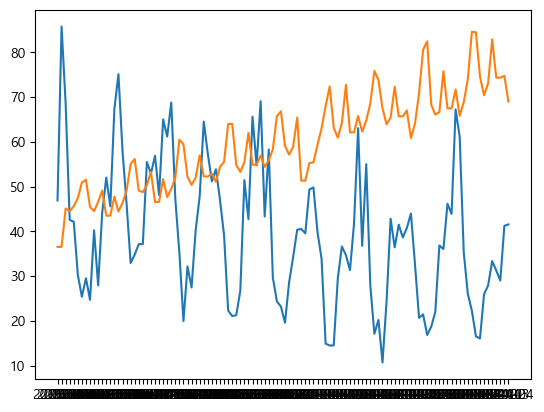

In [229]:
# 2015 ~ 2024 중국의 전기출력량과 서울의 미세먼지농도 시각화
plt.plot(concat_df["PM10"])
plt.plot(concat_df["Output of Electricity Current Period(100 million kwh)"] / 100)
plt.show()

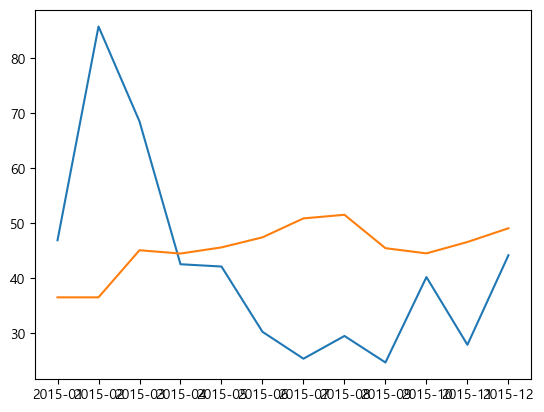

In [227]:
# 2015년도 중국의 전기출력량과 서울의 미세먼지농도 시각화
plt.plot(concat_df.loc["2015-01":"2015-12","PM10"])
plt.plot(concat_df.loc["2015-01":"2015-12", "Output of Electricity Current Period(100 million kwh)"] / 100)
plt.show()

In [221]:
# 피어슨
rho, p_value = stats.pearsonr(concat_df["Output of Electricity Current Period(100 million kwh)"], concat_df["PM10"])
print(rho, p_value)

-0.5301530726812609 1.838478969402364e-09


In [222]:
# 스피어만
rho, p_value = stats.spearmanr(concat_df["Output of Electricity Current Period(100 million kwh)"], concat_df["PM10"])
print(rho, p_value)

-0.5217506439892867 3.6547456801611896e-09


In [223]:
# 켄달
rho, p_value = stats.kendalltau(concat_df["Output of Electricity Current Period(100 million kwh)"], concat_df["PM10"])
print(rho, p_value)

-0.3596845473975626 1.9371367013556696e-08
